IMPORTS

In [1]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from dateutil.parser import parse
from dateutil import parser
import seaborn as sns
import networkx as nx
from collections import Counter
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import plotly.graph_objects as go
from shapely.geometry import Point, LineString
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import plotly.express as px
import numpy as np

Lendo dados para zonas

In [2]:
zones = pd.read_excel('data/coordsZonas.xlsx', index_col=0, engine='openpyxl')
columns_to_drop = [36, 41, 50, 52, 55, 53, 35, 54]

# Drop only existing columns
zones = zones.drop(columns=columns_to_drop, errors='ignore')
# 
# Drop rows with specified indexes
zones = zones.drop(index=columns_to_drop, errors='ignore')

zones

,Nome_ZT,XCOORD,YCOORD
ZTrafego,,,
1,Centro,-45.886701,-23.190638
2,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009
3,Jardim Paulista e Monte Castelo,-45.873745,-23.182939
4,Vila So Pedro e Jardim Jussara,-45.869327,-23.188904
5,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879
6,Vila Adyanna e Vila Betania,-45.892252,-23.203218
7,Vila Ema e Jardim Esplanada,-45.902175,-23.199704
8,Santana e Vila Rossi,-45.898069,-23.165302
9,Vila Industrial e VilaTatetuba,-45.857077,-23.180798


#### Reading Weekly Cases File 

In [3]:
cases = pd.read_csv('data/semanal_2015.csv', index_col=0)
cases

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
semana_epi,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,108.0,125.0,72.0,105.0,23.0,20.0,31.0,172.0,118.0,28.0,...,5.0,123.0,53.0,174.0,10.0,1.0,44.0,0.0,4.0,14.0
533,112.0,115.0,103.0,98.0,35.0,33.0,58.0,201.0,161.0,34.0,...,6.0,150.0,89.0,266.0,22.0,1.0,37.0,2.0,2.0,14.0
534,49.0,52.0,46.0,37.0,12.0,11.0,27.0,124.0,73.0,22.0,...,7.0,71.0,53.0,148.0,15.0,4.0,26.0,3.0,4.0,6.0


#### Aplicando Log no eixo y

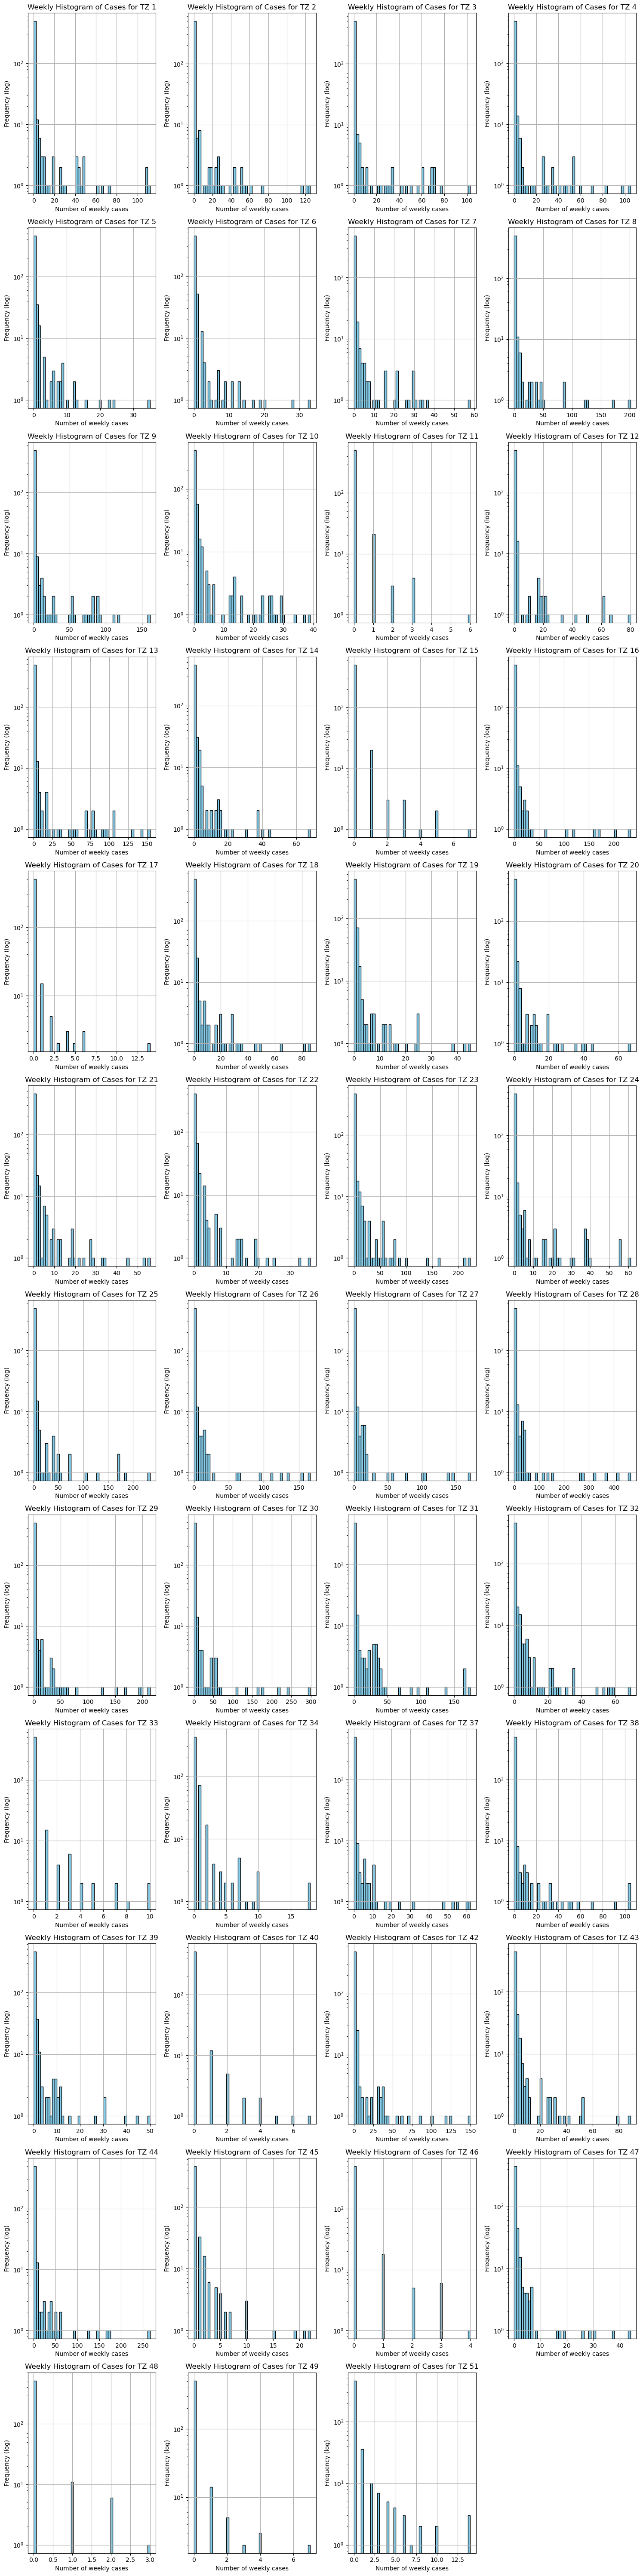

In [4]:
num_cols = 4 
num_rows = int(np.ceil(len(cases.columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, col in enumerate(cases.columns):
    ax = axes[i]
    ax.hist(cases[col], bins=50, edgecolor='black', color='skyblue')
    ax.set_xlabel('Number of weekly cases')
    ax.set_ylabel('Frequency (log)')
    ax.set_title(f'Weekly Histogram of Cases for TZ {col}')
    ax.grid(True)
    ax.set_yscale('log')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [5]:
zt_colors = {}
colors = px.colors.qualitative.Plotly + px.colors.qualitative.Set1 + px.colors.qualitative.Dark24
for i, zt in enumerate(cases.columns):
    zt_colors[zt] = colors[i % len(colors)] 

fig = go.Figure()

# Adding the Time Series
for zt in cases.columns:
    fig.add_trace(go.Scatter(x=cases.index, y=cases[zt], mode='lines', name=zt, line=dict(color=zt_colors[zt])))

fig.update_layout(
    title='Time Series of Weekly Cases by TZ',
    xaxis_title='Week',
    yaxis_title='Number of Weekly Cases',
    legend_title='TZ',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3, 
        xanchor='right',
        x=1
    ),
    height=600
)

fig.update_yaxes(type='log')
fig.show()


#### GENERATION OF GRAPHS FROM CALCULATED MUTUAL INFORMATION

In [6]:
mutual_inf_df = pd.read_csv('data/weeklycases_mutualinformation.csv', index_col=0)
mutual_inf_df.columns = mutual_inf_df.columns.astype(int)

mutual_inf_df

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
1,1.000000,0.299699,0.245557,0.249601,0.188950,0.206260,0.212496,0.188878,0.226618,0.174067,...,0.084725,0.232498,0.190517,0.160413,0.176958,0.080931,0.136465,0.036587,0.062121,0.129715
2,0.293924,1.000000,0.179543,0.212506,0.155021,0.208909,0.193711,0.203235,0.197413,0.128705,...,0.061413,0.231451,0.200183,0.174742,0.160315,0.061291,0.178788,0.015994,0.046612,0.124304
3,0.235255,0.177711,1.000000,0.241946,0.163849,0.166301,0.195295,0.157274,0.204941,0.137463,...,0.060625,0.158262,0.188696,0.177382,0.119888,0.090016,0.114684,0.035461,0.045842,0.087121
4,0.242368,0.209677,0.241488,1.000000,0.216752,0.200454,0.179156,0.178945,0.216182,0.130736,...,0.088976,0.164102,0.195226,0.177736,0.164746,0.106504,0.143513,0.034090,0.083821,0.117361
5,0.179675,0.151074,0.154723,0.208004,1.000000,0.154987,0.185002,0.148929,0.173474,0.118716,...,0.063326,0.167057,0.169314,0.147887,0.165706,0.073559,0.131268,0.025582,0.027549,0.080946
6,0.207383,0.205123,0.174809,0.203794,0.164406,1.000000,0.205840,0.182976,0.190916,0.107059,...,0.098840,0.188025,0.163755,0.184511,0.124831,0.069117,0.135035,0.057868,0.083569,0.123438
7,0.209019,0.188674,0.200000,0.190982,0.191747,0.208733,1.000000,0.179456,0.184289,0.126284,...,0.082562,0.194280,0.187651,0.178853,0.141779,0.074681,0.137271,0.036193,0.061349,0.091667
8,0.201255,0.216019,0.166980,0.195191,0.158088,0.202190,0.192226,1.000000,0.215150,0.132050,...,0.106265,0.283155,0.241344,0.253602,0.154392,0.073919,0.197417,0.053089,0.066355,0.134655
9,0.230172,0.216310,0.208452,0.217680,0.178510,0.196919,0.197860,0.210411,1.000000,0.181642,...,0.073291,0.218046,0.220551,0.239044,0.133591,0.055295,0.140475,0.020206,0.049842,0.118186
10,0.163604,0.116247,0.135318,0.113410,0.120795,0.105675,0.126388,0.103684,0.171966,1.000000,...,0.045368,0.124181,0.135339,0.060840,0.178603,0.058281,0.067349,0.022570,0.049798,0.050625


In [7]:
def save_adj_mtx_and_nodes(graph, mtx_filename, nodes_filename):
    nodes = list(graph.nodes())
    adj_mtx = nx.adjacency_matrix(graph, nodelist=nodes).todense()

    adj_mtx = (adj_mtx !=0).astype(int)

    np.savetxt(mtx_filename, adj_mtx, fmt = '%d')

    with open(nodes_filename, 'w') as f:
        for node in nodes:
            f.write(f'{node}\n')   

### THRESHOLD 1 - Any Non-Zero Value Generates an Edge

In [8]:
import pickle
def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)

In [9]:
THRESHOLD_1 = 0
nodos = list(mutual_inf_df.index)

grafo = nx.Graph()
grafo.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= THRESHOLD_1:
                grafo.add_edge(i, j, weight=mutual_inf_df.loc[i, j])
            else:
                print("Mutual Information Calculated Between ", i, j, mutual_inf_df.loc[i, j])

print(grafo)

save_adj_mtx_and_nodes(grafo, 'output/grafo1_dengue_mtx.txt', 'output/grafo1_dengue_nodes.txt')

Graph with 47 nodes and 1081 edges


#### Creating Similarity Matrices by Varying Thresholds

In [10]:
# Function to filter the adjacency matrix based on the threshold, converting values above the threshold to 1
def filter_adjacency_matrix(adj_matrix, threshold):
    binary_matrix = np.where(adj_matrix > threshold, 1, 0)
    return binary_matrix

# Function to Save the Adjacency Matrix with the Actual Values
def save_adj_mtx_with_actual_values(adj_matrix, threshold):
    mtx_filename = f'filtered_adj_matrix_threshold_{threshold:.2f}.txt'
    
    folder = 'output/mtx_dengue/'
    np.savetxt(folder+mtx_filename, adj_matrix, fmt='%d')
    print(f'Saved filtered adjacency matrix with threshold {threshold:.2f} to {mtx_filename}')

# Get the Adjacency Matrix of the Graph with Weights
adj_matrix = nx.to_numpy_array(grafo, weight='weight')

# Iterate Over Thresholds from 0 to 1 with Steps of 0.1
for threshold in np.arange(0, 1, 0.02):
    filtered_matrix = filter_adjacency_matrix(adj_matrix, threshold)
    if np.any(filtered_matrix):
        save_adj_mtx_with_actual_values(filtered_matrix, threshold)
    else:
        print(f'Matriz filtrada com limiar {threshold:.0f} só contém zeros. Interrompendo o loop...')
        break

Saved filtered adjacency matrix with threshold 0.00 to filtered_adj_matrix_threshold_0.00.txt
Saved filtered adjacency matrix with threshold 0.02 to filtered_adj_matrix_threshold_0.02.txt
Saved filtered adjacency matrix with threshold 0.04 to filtered_adj_matrix_threshold_0.04.txt
Saved filtered adjacency matrix with threshold 0.06 to filtered_adj_matrix_threshold_0.06.txt
Saved filtered adjacency matrix with threshold 0.08 to filtered_adj_matrix_threshold_0.08.txt
Saved filtered adjacency matrix with threshold 0.10 to filtered_adj_matrix_threshold_0.10.txt
Saved filtered adjacency matrix with threshold 0.12 to filtered_adj_matrix_threshold_0.12.txt
Saved filtered adjacency matrix with threshold 0.14 to filtered_adj_matrix_threshold_0.14.txt
Saved filtered adjacency matrix with threshold 0.16 to filtered_adj_matrix_threshold_0.16.txt
Saved filtered adjacency matrix with threshold 0.18 to filtered_adj_matrix_threshold_0.18.txt
Saved filtered adjacency matrix with threshold 0.20 to filte

Degree centrality

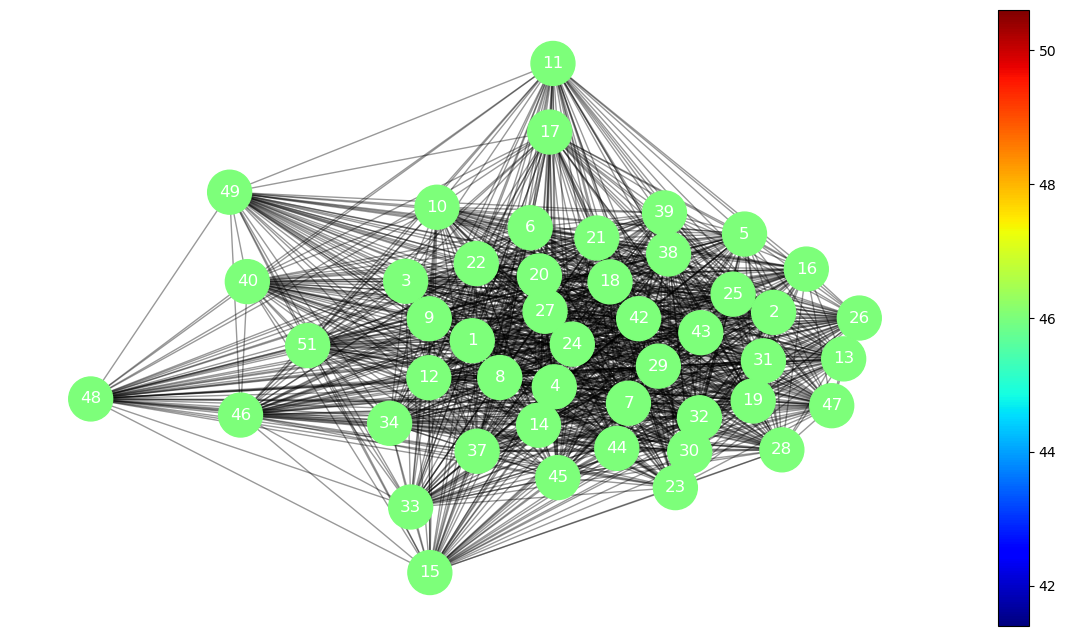

In [11]:

# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo,seed=123456789,k=1)
# color of nodes
color = list(dict(nx.degree(grafo)).values())

# draw edges
nx.draw_networkx_edges(grafo,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

Graph with 47 nodes and 1081 edges


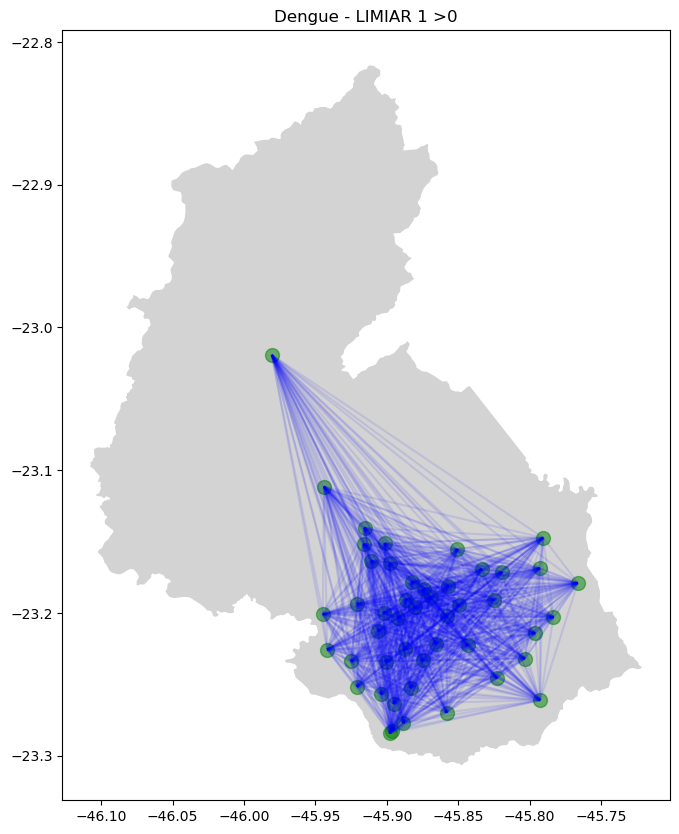

In [12]:
# Criar geometria dos pontos
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Criar GeoDataFrame dos nós
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

print(grafo)
# Criar lista de linhas para as arestas do grafo
lines = []
for edge in grafo.edges():
    start_node = edge[0]
    end_node = edge[1]

    # Verificar se os nós existem no DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'Um dos nos na aresta nao existe: {start_node} ou {end_node}')

# Criar GeoDataFrame das linhas
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')
# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot os pontos adicionais
gdf_zones.plot(ax=ax, color='green', alpha=0.5, markersize=100)

# Plot as linhas das arestas
gdf_lines.plot(ax=ax, color='blue', alpha=0.1, aspect='equal')

# Add title
plt.title(f'Dengue - LIMIAR 1 >{THRESHOLD_1}')

# Show the map
plt.show()


In [13]:
def calcula_metricas(grafo):
    total_graph = grafo.copy()
    
    # Check if the graph is connected and get the largest component
    if not nx.is_connected(grafo):
        print("Não é conectado")
        componentes = list(nx.connected_components(grafo))
        print(type(componentes))
        maior_componente = max(componentes, key=len)
        grafo = grafo.subgraph(maior_componente).copy()

    # Helper function to find all nodes with the maximum value
    def get_nodes_with_max_value(dictionary):
        print(dictionary)
        max_value = max(dictionary.values())
        return [(node,value) for node, value in dictionary.items() if value == max_value]
    
    # Calculate the measures in the largest component
    degree_dict = dict(nx.degree(grafo))
    grau_medio = sum(degree_dict.values()) / len(grafo)
    aglomeracao_dict = nx.clustering(grafo)
    aglomeracao_medio = nx.average_clustering(grafo)
    minimo_caminho_medio = nx.average_shortest_path_length(grafo)
    diametro = nx.diameter(grafo)
    betweenness_centrality = nx.betweenness_centrality(grafo)
    betweenness_medio = sum(betweenness_centrality.values()) / len(grafo)
    degree_centrality = nx.degree_centrality(grafo)
    
    # Find all nodes with maximum values in the measures
    maiores_graus = get_nodes_with_max_value(degree_dict)
    maiores_aglomeracao = get_nodes_with_max_value(aglomeracao_dict)
    maiores_degree_centrality = get_nodes_with_max_value(degree_centrality)
    maiores_betweenness_centrality = get_nodes_with_max_value(betweenness_centrality)
    
    # Metrics for the entire graph
    degree_dict_total = dict(nx.degree(total_graph))
    grau_medio_total = sum(degree_dict_total.values()) / len(total_graph)
    aglomeracao_dict_total = nx.clustering(total_graph)
    aglomeracao_media_total = nx.average_clustering(total_graph)
    betweenness_centrality_total = nx.betweenness_centrality(total_graph)
    betweenness_medio_total = sum(betweenness_centrality_total.values()) / len(total_graph)
    degree_centrality_total = nx.degree_centrality(total_graph)
    
    # Find all nodes with maximum values in the measures for the entire graph
    maiores_graus_total = get_nodes_with_max_value(degree_dict_total)
    maiores_aglomeracao_total = get_nodes_with_max_value(aglomeracao_dict_total)
    maiores_degree_centrality_total = get_nodes_with_max_value(degree_centrality_total)
    maiores_betweenness_centrality_total = get_nodes_with_max_value(betweenness_centrality_total)

    print('\nMETRICS FOR THE ENTIRE GRAPH')
    
    print(f'Number of nodes in the original graph: {total_graph.number_of_nodes()}')
    print(f'Number of edges in the original graph: {total_graph.number_of_edges()}')
    # Display measures for the entire graph
    print("Average Degree:", grau_medio_total)
    print("Average Clustering:", aglomeracao_media_total)
    print("Average Betweenness:", betweenness_medio_total)
    # Display nodes with the highest centrality indices
    print("\nNodes with highest degree:", maiores_graus_total)
    print("Nodes with highest clustering centrality:", maiores_aglomeracao_total)
    print("Nodes with highest degree centrality:", maiores_degree_centrality_total)
    print("Nodes with highest betweenness centrality:", maiores_betweenness_centrality_total)

    print('\nMETRICS FOR THE LARGEST COMPONENT OF THE GRAPH')
    # Display information about the largest component
    print("Number of nodes in the largest component:", grafo.number_of_nodes())
    print("Number of edges in the largest component:", grafo.number_of_edges())
    # Display the measures calculated for the largest component
    print("Average Degree:", grau_medio)
    print("Average Clustering:", aglomeracao_medio)
    print("Average Shortest Path:", minimo_caminho_medio)
    print("Diameter:", diametro)
    print("Average Betweenness:", betweenness_medio)

    # Display nodes with the highest centrality indices in the largest component
    print("\nNodes with highest degree in the largest component:", maiores_graus)
    print("Nodes with highest clustering centrality in the largest component:", maiores_aglomeracao)
    print("Nodes with highest degree centrality in the largest component:", maiores_degree_centrality)
    print("Nodes with highest betweenness centrality in the largest component:", maiores_betweenness_centrality)

In [14]:
def top_x_nodes_by_strength_and_centrality(G, top_x=10):
    # Calculate the strength (sum of edge weights) for each node
    strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

    # Calculate closeness centrality using the inverse of the edge weight
    for u, v, data in G.edges(data=True):
        data['inverse_weight'] = 1 / data['weight'] if data['weight'] != 0 else 0
    
    closeness_centrality = nx.closeness_centrality(G, distance='inverse_weight')

    # Calculate betweenness centrality using the inverse of the weight
    betweenness_centrality = nx.betweenness_centrality(G, weight='inverse_weight')

    # Calculate other centrality measures
    degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')

    # Calculate clustering coefficient for each node
    # clustering_coefficients = nx.clustering(G)
    clustering_coefficients = nx.clustering(G, weight='weight')

    def get_top_with_ties(metric_dict, top_x):
        sorted_nodes = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)
        top_nodes = sorted_nodes[:top_x]
        
        if len(sorted_nodes) > top_x:
            cutoff_value = top_nodes[-1][1]
            for node, value in sorted_nodes[top_x:]:
                if value == cutoff_value:
                    top_nodes.append((node, value))
                else:
                    break
        return top_nodes

    # Sort nodes by different centralities
    top_strength_nodes = get_top_with_ties(strength, top_x)
    top_closeness_nodes = get_top_with_ties(closeness_centrality, top_x)
    top_betweenness_nodes = get_top_with_ties(betweenness_centrality, top_x)
    top_degree_nodes = get_top_with_ties(degree_centrality, top_x)
    top_eigenvector_nodes = get_top_with_ties(eigenvector_centrality, top_x)
    top_clustering_nodes = get_top_with_ties(clustering_coefficients, top_x)

    print(f"Top {top_x} nodes by strength based on edge weights:")
    for node, value in top_strength_nodes:
        print(f"{node} - {value:.2f}")

    print(f"\nTop {top_x} nodes by closeness centrality (inverse of weight):")
    for node, value in top_closeness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by betweenness centrality (inverse of weight):")
    for node, value in top_betweenness_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by degree centrality:")
    for node, value in top_degree_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by eigenvector centrality:")
    for node, value in top_eigenvector_nodes:
        print(f"{node} - {value:.4f}")

    print(f"\nTop {top_x} nodes by clustering coefficient:")
    for node, value in top_clustering_nodes:
        print(f"{node} - {value:.4f}")

In [15]:
calcula_metricas(grafo)

{1: 46, 2: 46, 3: 46, 4: 46, 5: 46, 6: 46, 7: 46, 8: 46, 9: 46, 10: 46, 11: 46, 12: 46, 13: 46, 14: 46, 15: 46, 16: 46, 17: 46, 18: 46, 19: 46, 20: 46, 21: 46, 22: 46, 23: 46, 24: 46, 25: 46, 26: 46, 27: 46, 28: 46, 29: 46, 30: 46, 31: 46, 32: 46, 33: 46, 34: 46, 37: 46, 38: 46, 39: 46, 40: 46, 42: 46, 43: 46, 44: 46, 45: 46, 46: 46, 47: 46, 48: 46, 49: 46, 51: 46}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 51: 1.0}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 

In [16]:
# top_nodes_analysis(grafo, 5)
top_x_nodes_by_strength_and_centrality(grafo)

Top 10 nodes by strength based on edge weights:
29 - 9.07
24 - 8.81
8 - 8.69
18 - 8.46
20 - 8.43
42 - 8.40
43 - 8.07
30 - 8.04
44 - 7.94
1 - 7.91

Top 10 nodes by closeness centrality (inverse of weight):
11 - 0.2198
13 - 0.2198
15 - 0.2198
16 - 0.2198
25 - 0.2198
26 - 0.2198
27 - 0.2198
30 - 0.2198
48 - 0.2198
49 - 0.2198

Top 10 nodes by betweenness centrality (inverse of weight):
48 - 1.1433
27 - 0.2674
49 - 0.1074
30 - 0.0930
26 - 0.0623
8 - 0.0457
16 - 0.0446
13 - 0.0361
25 - 0.0319
18 - 0.0233

Top 10 nodes by degree centrality:
1 - 1.0000
2 - 1.0000
3 - 1.0000
4 - 1.0000
5 - 1.0000
6 - 1.0000
7 - 1.0000
8 - 1.0000
9 - 1.0000
10 - 1.0000
11 - 1.0000
12 - 1.0000
13 - 1.0000
14 - 1.0000
15 - 1.0000
16 - 1.0000
17 - 1.0000
18 - 1.0000
19 - 1.0000
20 - 1.0000
21 - 1.0000
22 - 1.0000
23 - 1.0000
24 - 1.0000
25 - 1.0000
26 - 1.0000
27 - 1.0000
28 - 1.0000
29 - 1.0000
30 - 1.0000
31 - 1.0000
32 - 1.0000
33 - 1.0000
34 - 1.0000
37 - 1.0000
38 - 1.0000
39 - 1.0000
40 - 1.0000
42 - 1.0000


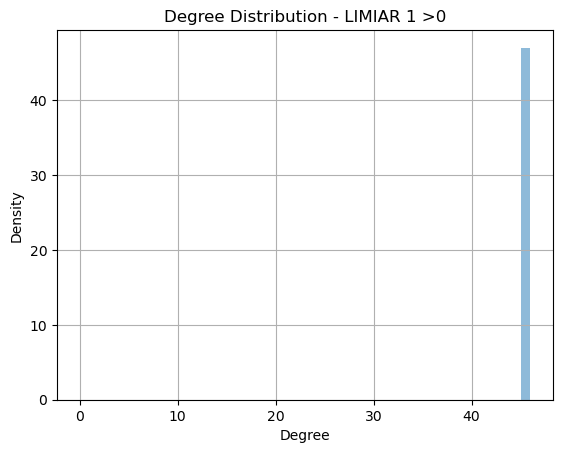

In [17]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 1 >{THRESHOLD_1}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

### THRESHOLD 2 - Percentile 5%

In [18]:
mutual_inf_df.stack()

1   1     1.000000
    2     0.299699
    3     0.245557
    4     0.249601
    5     0.188950
            ...   
51  46    0.071968
    47    0.070599
    48    0.055186
    49    0.076996
    51    1.000000
Length: 2209, dtype: float64

In [19]:
# Calculate the threshold based on the 5th percentile of the flows
threshold2 = mutual_inf_df.stack().quantile(0.95)
print(threshold2)

nodos = list(mutual_inf_df.index)

grafo2 = nx.Graph()
grafo2.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= threshold2:
                grafo2.add_edge(i, j, weight=mutual_inf_df.loc[i, j])
            
print(grafo2)           
save_adj_mtx_and_nodes(grafo2, 'output/grafo2_dengue_mtx.txt', 'output/grafo2_dengue_nodes.txt')

0.2569668036243782
Graph with 47 nodes and 32 edges


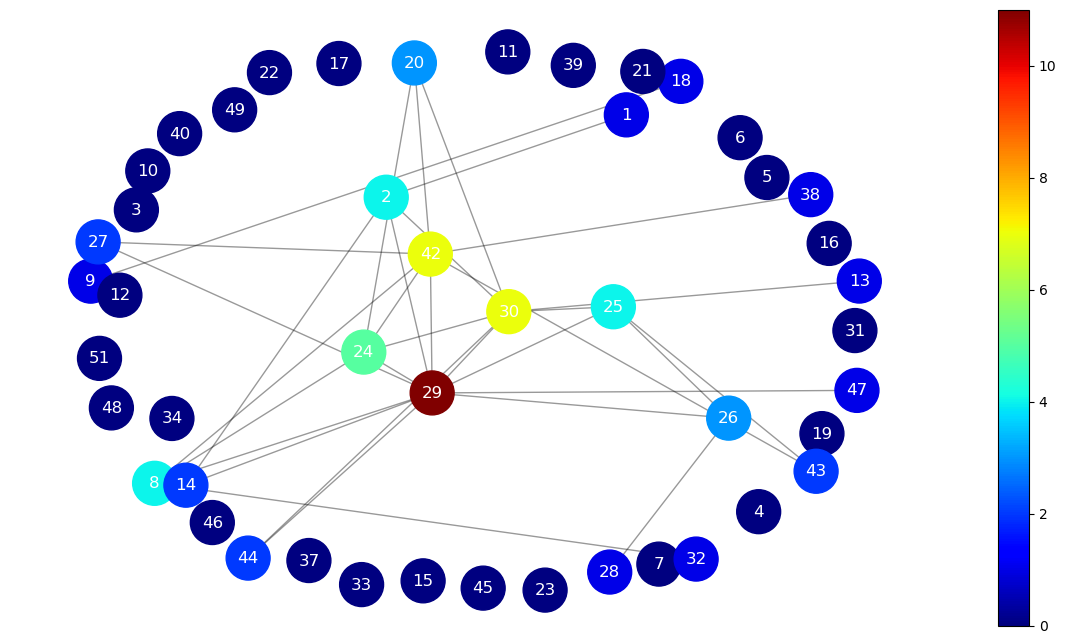

In [20]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(15,8))

# layout position
pos = nx.spring_layout(grafo2,seed=123456789,k=.9)
# color of nodes
color = list(dict(nx.degree(grafo2)).values())

# draw edges
nx.draw_networkx_edges(grafo2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(grafo2,
                 pos=pos,
                 node_size=1000,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(grafo2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
# plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_27780/2540094395.py:39: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



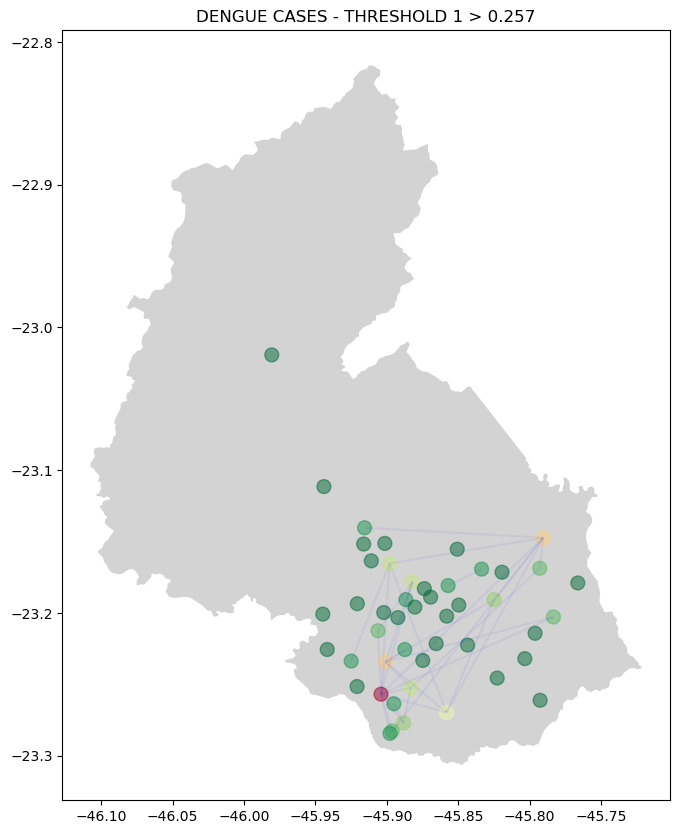

In [21]:
# Create geometry of points
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]

# Create GeoDataFrame of nodes
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')

# Create list of lines for the graph edges
lines = []
for edge in grafo2.edges():
    # print('Edges')
    start_node = edge[0]
    end_node = edge[1]

    # Check if the nodes exist in the DataFrame
    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'One of the nodes in the edge does not exist: {start_node} or {end_node}')

# Create GeoDataFrame for the lines
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

# Calculate the degree of each node
degree_dict = dict(grafo2.degree())

# Add the 'degree' column to gdf_zones
gdf_zones['grau'] = gdf_zones.index.map(degree_dict)

# Normalize the degrees to the range [0, 1]
max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['grau_normalizado'] = gdf_zones['grau'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

# Define the colormap (green -> red)
colormap = cm.get_cmap('RdYlGn_r')

# Map the normalized values to colors
gdf_zones['color'] = gdf_zones['grau_normalizado'].apply(lambda x: mcolors.to_hex(colormap(x)))

# Load the shapefile or GeoJSON file for São José dos Campos
sjc = gpd.read_file('data/map.geojson')

# Plot the map of SJC
ax = sjc.plot(figsize=(10, 10), color='lightgrey')

# Plot the points with colors based on degree
gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

# Plot the edge lines
gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

# Add title
# plt.title(f'Dengue - THRESHOLD 1 > {threshold2}')
plt.title(f'DENGUE CASES - THRESHOLD 1 > {round(threshold2, 3)}')

# Show the map
plt.show()


In [22]:
print(grafo2)

Graph with 47 nodes and 32 edges


In [23]:
calcula_metricas(grafo2)

Não é conectado
<class 'list'>
{1: 1, 2: 4, 8: 4, 13: 1, 14: 2, 20: 3, 24: 5, 25: 4, 26: 3, 27: 2, 28: 1, 29: 11, 30: 7, 32: 1, 38: 1, 42: 7, 43: 2, 44: 2, 47: 1}
{1: 0, 2: 0.3333333333333333, 8: 0.5, 13: 0, 14: 1.0, 20: 0.6666666666666666, 24: 0.6, 25: 0.3333333333333333, 26: 0.3333333333333333, 27: 1.0, 28: 0, 29: 0.18181818181818182, 30: 0.23809523809523808, 32: 0, 38: 0, 42: 0.23809523809523808, 43: 0, 44: 1.0, 47: 0}
{1: 0.05555555555555555, 2: 0.2222222222222222, 8: 0.2222222222222222, 13: 0.05555555555555555, 14: 0.1111111111111111, 20: 0.16666666666666666, 24: 0.2777777777777778, 25: 0.2222222222222222, 26: 0.16666666666666666, 27: 0.1111111111111111, 28: 0.05555555555555555, 29: 0.611111111111111, 30: 0.38888888888888884, 32: 0.05555555555555555, 38: 0.05555555555555555, 42: 0.38888888888888884, 43: 0.1111111111111111, 44: 0.1111111111111111, 47: 0.05555555555555555}
{1: 0.0, 2: 0.119281045751634, 8: 0.11111111111111112, 13: 0.0, 14: 0.0, 20: 0.008714596949891067, 24: 0.037581

In [24]:
# top_nodes_analysis(grafo2, 5)
top_x_nodes_by_strength_and_centrality(grafo2)

Top 10 nodes by strength based on edge weights:
29 - 3.13
30 - 2.00
42 - 1.90
24 - 1.34
25 - 1.11
8 - 1.11
2 - 1.10
26 - 0.86
20 - 0.80
44 - 0.60

Top 10 nodes by closeness centrality (inverse of weight):
29 - 0.0800
30 - 0.0641
42 - 0.0614
24 - 0.0589
8 - 0.0578
25 - 0.0568
2 - 0.0536
26 - 0.0531
44 - 0.0530
27 - 0.0522

Top 10 nodes by betweenness centrality (inverse of weight):
29 - 0.0928
30 - 0.0290
42 - 0.0280
2 - 0.0164
8 - 0.0164
26 - 0.0164
25 - 0.0058
1 - 0.0000
3 - 0.0000
4 - 0.0000
5 - 0.0000
6 - 0.0000
7 - 0.0000
9 - 0.0000
10 - 0.0000
11 - 0.0000
12 - 0.0000
13 - 0.0000
14 - 0.0000
15 - 0.0000
16 - 0.0000
17 - 0.0000
18 - 0.0000
19 - 0.0000
20 - 0.0000
21 - 0.0000
22 - 0.0000
23 - 0.0000
24 - 0.0000
27 - 0.0000
28 - 0.0000
31 - 0.0000
32 - 0.0000
33 - 0.0000
34 - 0.0000
37 - 0.0000
38 - 0.0000
39 - 0.0000
40 - 0.0000
43 - 0.0000
44 - 0.0000
45 - 0.0000
46 - 0.0000
47 - 0.0000
48 - 0.0000
49 - 0.0000
51 - 0.0000

Top 10 nodes by degree centrality:
29 - 0.2391
30 - 0.1522
4

In [25]:
save_graph(grafo2, "grafo2_dengue.pkl")

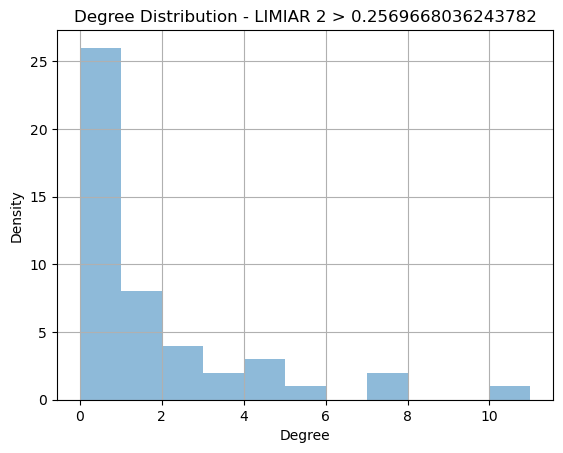

In [26]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo2.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 2 > {threshold2}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

#### THRESHOLD 3 - Maximum Diameter Threshold  

We Did Not Consider Only the Connected Component

In [27]:
# Rebuilding the graph with all connections where the correlation is above 0
nodos = list(mutual_inf_df.index)

grafo = nx.Graph()
grafo.add_nodes_from(nodos)

for i in nodos:
    for j in nodos:
        if i < j:
            if mutual_inf_df.loc[i, j] >= 0:
                grafo.add_edge(i, j, weight=mutual_inf_df.loc[i, j])

print(len(grafo.edges))                     

1081


In [28]:
print(grafo)

Graph with 47 nodes and 1081 edges


In [29]:
import networkx as nx

def find_max_diameter_graph(original_graph):
    max_diameter = -1
    max_diameter_graph = None
    min_threshold = 10000000
    max_graph = None
    final_graph = None
    
    # Determine the list of thresholds based on the edge weights, sorted from highest to lowest
    thresholds = sorted(set(weight for u, v, weight in original_graph.edges(data='weight')), reverse=True)
    print(thresholds)
    
    # Iterate over the thresholds
    for threshold in thresholds:
        # Create a copy of the original graph
        graph_copy = original_graph.copy()
        
        # Remove edges with weights below the threshold
        edges_to_remove = [(u, v) for u, v, weight in original_graph.edges(data='weight') if weight < threshold]
        graph_copy.remove_edges_from(edges_to_remove)
        
        # Find the largest connected component
        largest_connected_component = max(nx.connected_components(graph_copy), key=len)
        
        # Create a subgraph with only the largest connected component
        subgraph = graph_copy.subgraph(largest_connected_component)
        
        # Calculate the diameter of the subgraph
        diameter = nx.diameter(subgraph)
        
        # Check if the diameter is greater than the maximum found so far
        if diameter >= max_diameter:
            max_diameter = diameter
            max_diameter_graph = subgraph
            min_threshold = threshold
            max_graph = graph_copy
                 
    return max_graph, max_diameter_graph, max_diameter, min_threshold

# Example usage:
# Suppose 'grafo' is your original graph
grafo4, max_diameter_graph, diameter, threshold = find_max_diameter_graph(grafo)
# nx.write_adjlist(grafo4,'grafo3_dengue.adjlist')
save_adj_mtx_and_nodes(grafo4, 'output/grafo3_dengue_mtx.txt', 'output/grafo3_dengue_nodes.txt')


[0.3225694053063268, 0.3218815140817668, 0.3016038127060838, 0.3013070737643235, 0.299698761582309, 0.2976508472929722, 0.2967348674205818, 0.2940152299615142, 0.2856048753361526, 0.285428495498127, 0.2831553292713162, 0.2829559382389313, 0.2800428617989183, 0.2773082101459967, 0.2759844065704637, 0.2744104261765629, 0.2741278139238998, 0.2692503697389483, 0.2692471634880853, 0.2683323427350763, 0.2679899474879796, 0.2677608373810134, 0.264661290294097, 0.260981987148142, 0.2608315042314748, 0.2602260915627639, 0.2599884855377294, 0.2594731381084028, 0.2593216337230011, 0.2583627818792027, 0.2576710718181649, 0.2575109556330313, 0.2565051063238015, 0.2553638079695006, 0.2551415621599608, 0.2543549979076083, 0.2540377506958657, 0.2536017574820115, 0.2526310517942511, 0.25223593755369, 0.2515059585458488, 0.2509517310263565, 0.2504253431510239, 0.2497482246667308, 0.2496006807411492, 0.249132030475478, 0.2489862589254157, 0.2485479438889681, 0.2485076936811667, 0.2476158301518092, 0.2474

In [30]:
print(grafo4)

Graph with 47 nodes and 48 edges


In [31]:
print(max_diameter_graph)

Graph with 26 nodes and 48 edges


In [32]:
print('Max Diameter: ', diameter)

Max Diameter:  6


In [33]:
print('Min Threshold: ', threshold)

Min Threshold:  0.2485479438889681


In [34]:
# Iterar sobre as arestas e imprimir o peso de cada uma
for u, v, weight in grafo4.edges(data='weight'):
    print(f"Edges ({u}, {v}) with weights: {weight}")

Edges (1, 2) with weights: 0.299698761582309
Edges (1, 4) with weights: 0.2496006807411492
Edges (2, 14) with weights: 0.2692471634880853
Edges (2, 24) with weights: 0.2509517310263565
Edges (2, 29) with weights: 0.2602260915627639
Edges (2, 30) with weights: 0.2683323427350763
Edges (8, 20) with weights: 0.25223593755369
Edges (8, 24) with weights: 0.264661290294097
Edges (8, 29) with weights: 0.2976508472929722
Edges (8, 30) with weights: 0.2543549979076083
Edges (8, 32) with weights: 0.2608315042314748
Edges (8, 42) with weights: 0.2831553292713162
Edges (8, 44) with weights: 0.2536017574820115
Edges (9, 18) with weights: 0.2800428617989183
Edges (12, 29) with weights: 0.2485479438889681
Edges (13, 30) with weights: 0.3016038127060838
Edges (14, 29) with weights: 0.2599884855377294
Edges (14, 44) with weights: 0.2489862589254157
Edges (16, 29) with weights: 0.2551415621599608
Edges (18, 24) with weights: 0.2540377506958657
Edges (20, 21) with weights: 0.2565051063238015
Edges (20, 2

In [35]:
# Check other connected components in max_graph
other_components = [comp for comp in nx.connected_components(grafo4) if len(comp) > 1 and comp != set(max_diameter_graph.nodes)]

# Print information about other connected components
if other_components:
    print("Other connected components with more than one node:")
    for comp in other_components:
        print(f"Component: {comp} - Number of nodes: {len(comp)}")
else:
    print("There are no other connected components with more than one node.")

There are no other connected components with more than one node.


Filtered edges: [(1, 2), (1, 4), (2, 14), (2, 24), (2, 29), (2, 30), (8, 20), (8, 24), (8, 29), (8, 30), (8, 32), (8, 42), (8, 44), (9, 18), (13, 30), (14, 29), (14, 44), (16, 29), (18, 24), (20, 21), (20, 24), (20, 30), (20, 42), (20, 44), (24, 29), (24, 30), (24, 42), (24, 43), (25, 26), (25, 29), (25, 30), (25, 43), (25, 44), (26, 28), (26, 29), (27, 29), (27, 30), (27, 42), (27, 47), (29, 30), (29, 42), (29, 44), (29, 47), (30, 44), (31, 32), (38, 42), (42, 43)]


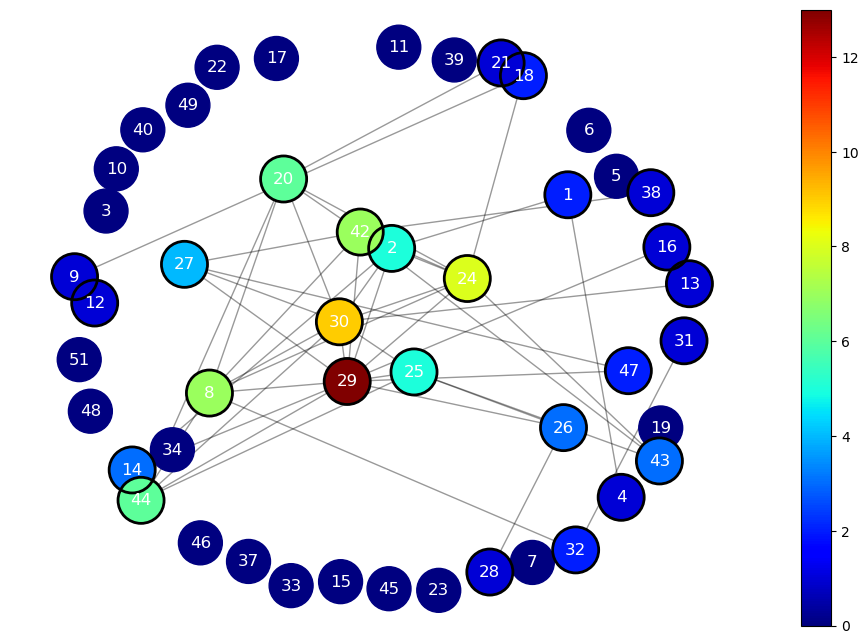

In [36]:
# Function to show the graph with highlighted nodes from the largest connected component
def show_graph_with_highlighted_nodes(graph, max_diameter_graph, threshold):
    # Figure setup
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Layout for node positioning
    pos = nx.spring_layout(graph, seed=123456789, k=0.9)

    # Node colors based on graph degree
    color = [dict(nx.degree(graph)).get(node, 0) for node in graph.nodes()]

    # Filter edges with weight less than the threshold
    edges_to_draw = [(u, v) for u, v, weight in graph.edges(data='weight') if weight > threshold]
    print(f'Filtered edges: {edges_to_draw}')

    # Draw the filtered edges
    nx.draw_networkx_edges(graph,
                           edgelist=edges_to_draw,
                           pos=pos,
                           alpha=0.4, ax=ax)

    # Draw all nodes
    nodes = nx.draw_networkx_nodes(graph,
                                   pos=pos,
                                   node_size=1000,
                                   node_color=color,
                                   cmap=plt.cm.jet, ax=ax)

    # Add border to the nodes that are part of max_diameter_graph
    nx.draw_networkx_nodes(graph,
                           pos=pos,
                           nodelist=max_diameter_graph.nodes(),
                           node_size=1100,
                           edgecolors='black',
                           node_color='none',
                           linewidths=2, ax=ax)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos=pos,
                            font_color='white', ax=ax)

    plt.axis("off")
    plt.colorbar(nodes)
    plt.show()

show_graph_with_highlighted_nodes(grafo4, max_diameter_graph, threshold=threshold)


/var/folders/0p/5510gchj13qdnm063wyk5hsc0000gn/T/ipykernel_27780/639155095.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



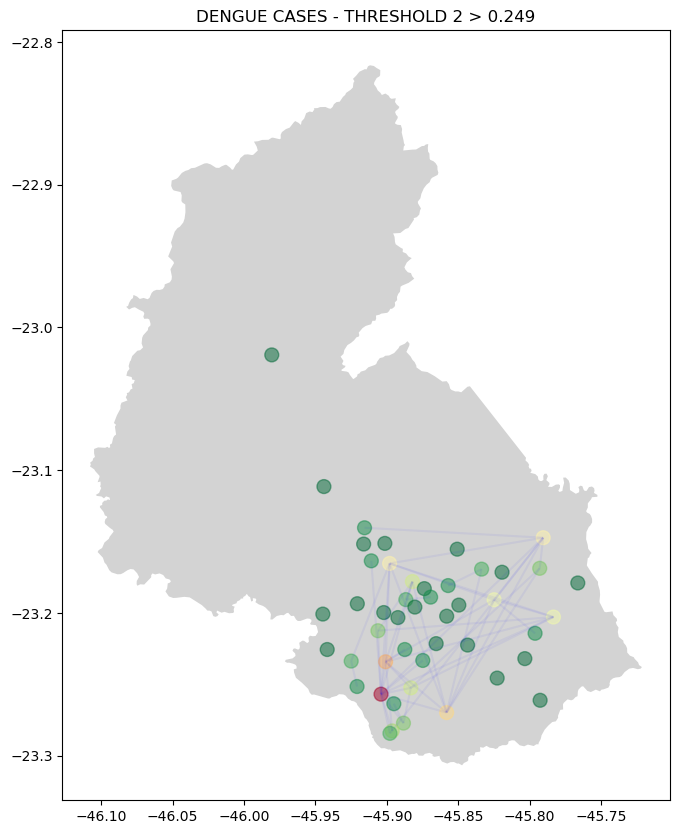

In [37]:
geometry = [Point(xy) for xy in zip(zones['XCOORD'], zones['YCOORD'])]
gdf_zones = gpd.GeoDataFrame(zones, geometry=geometry, crs='EPSG:4326')
lines = []
for edge in grafo4.edges():
    start_node = edge[0]
    end_node = edge[1]

    if start_node in gdf_zones.index and end_node in gdf_zones.index:
        start_point = (gdf_zones.loc[start_node].geometry.x, gdf_zones.loc[start_node].geometry.y)
        end_point = (gdf_zones.loc[end_node].geometry.x, gdf_zones.loc[end_node].geometry.y)
        line = LineString([start_point, end_point])
        lines.append(line)
    else:
        print(f'Um dos nos na aresta nao existe: {start_node} ou {end_node}')

gdf_lines = gpd.GeoDataFrame(geometry=lines, crs='EPSG:4326')

degree_dict = dict(grafo4.degree())

gdf_zones['grau'] = gdf_zones.index.map(degree_dict)

max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())

gdf_zones['grau_normalizado'] = gdf_zones['grau'].apply(lambda x: (x - min_degree) / (max_degree - min_degree))

colormap = cm.get_cmap('RdYlGn_r')

gdf_zones['color'] = gdf_zones['grau_normalizado'].apply(lambda x: mcolors.to_hex(colormap(x)))

sjc = gpd.read_file('data/map.geojson')

ax = sjc.plot(figsize=(10, 10), color='lightgrey')

gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, markersize=100)

gdf_lines.plot(ax=ax, color='blue', alpha=0.05, aspect='equal')

plt.title(f'DENGUE CASES - THRESHOLD 2 > {round(threshold, 3)}')
plt.show()

In [38]:
print(grafo4)

Graph with 47 nodes and 48 edges


In [39]:
calcula_metricas(grafo4)

Não é conectado
<class 'list'>
{1: 2, 2: 5, 4: 1, 8: 7, 9: 1, 12: 1, 13: 1, 14: 3, 16: 1, 18: 2, 20: 6, 21: 1, 24: 8, 25: 5, 26: 3, 27: 4, 28: 1, 29: 13, 30: 9, 31: 1, 32: 2, 38: 1, 42: 7, 43: 3, 44: 6, 47: 2}
{1: 0, 2: 0.4, 4: 0, 8: 0.5238095238095238, 9: 0, 12: 0, 13: 0, 14: 0.6666666666666666, 16: 0, 18: 0, 20: 0.4666666666666667, 21: 0, 24: 0.39285714285714285, 25: 0.4, 26: 0.3333333333333333, 27: 0.5, 28: 0, 29: 0.21794871794871795, 30: 0.3611111111111111, 31: 0, 32: 0, 38: 0, 42: 0.3333333333333333, 43: 0.3333333333333333, 44: 0.5333333333333333, 47: 1.0}
{1: 0.08, 2: 0.2, 4: 0.04, 8: 0.28, 9: 0.04, 12: 0.04, 13: 0.04, 14: 0.12, 16: 0.04, 18: 0.08, 20: 0.24, 21: 0.04, 24: 0.32, 25: 0.2, 26: 0.12, 27: 0.16, 28: 0.04, 29: 0.52, 30: 0.36, 31: 0.04, 32: 0.08, 38: 0.04, 42: 0.28, 43: 0.12, 44: 0.24, 47: 0.08}
{1: 0.08, 2: 0.16122222222222224, 4: 0.0, 8: 0.1675793650793651, 9: 0.0, 12: 0.0, 13: 0.0, 14: 0.0033333333333333335, 16: 0.0, 18: 0.08, 20: 0.08738888888888889, 21: 0.0, 24: 0.2

In [40]:
# top_nodes_analysis(grafo4, 5)
top_x_nodes_by_strength_and_centrality(grafo4)

Top 10 nodes by strength based on edge weights:
29 - 3.64
30 - 2.51
24 - 2.10
42 - 1.90
8 - 1.87
44 - 1.60
20 - 1.56
25 - 1.36
2 - 1.35
27 - 1.05

Top 10 nodes by closeness centrality (inverse of weight):
29 - 0.0921
30 - 0.0819
24 - 0.0816
8 - 0.0777
42 - 0.0746
44 - 0.0718
2 - 0.0702
20 - 0.0675
25 - 0.0673
27 - 0.0654

Top 10 nodes by betweenness centrality (inverse of weight):
29 - 0.1517
24 - 0.0531
30 - 0.0454
2 - 0.0444
8 - 0.0444
42 - 0.0357
1 - 0.0232
18 - 0.0232
20 - 0.0232
26 - 0.0232
32 - 0.0232

Top 10 nodes by degree centrality:
29 - 0.2826
30 - 0.1957
24 - 0.1739
8 - 0.1522
42 - 0.1522
20 - 0.1304
44 - 0.1304
2 - 0.1087
25 - 0.1087
27 - 0.0870

Top 10 nodes by eigenvector centrality:
29 - 0.4584
30 - 0.3832
24 - 0.3234
8 - 0.3213
44 - 0.2876
42 - 0.2763
20 - 0.2506
25 - 0.2239
2 - 0.2076
27 - 0.1903

Top 10 nodes by clustering coefficient:
47 - 0.8173
14 - 0.5565
44 - 0.4566
8 - 0.4400
27 - 0.4248
20 - 0.3805
25 - 0.3539
2 - 0.3307
24 - 0.3280
30 - 0.3094


In [41]:
save_graph(grafo4, "grafo4_dengue.pkl")

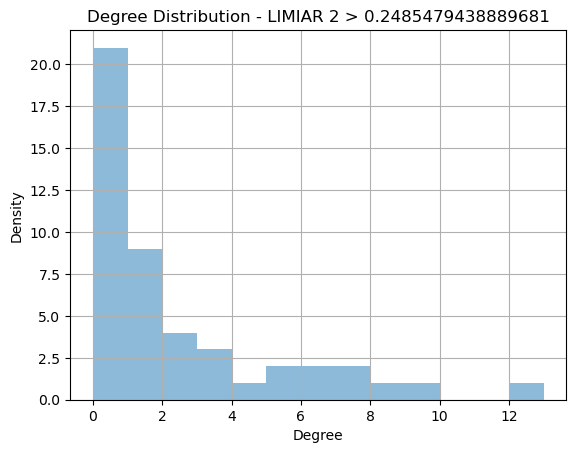

In [42]:
# Calculate the degree of each node
degrees = [degree for node, degree in grafo4.degree()]

# Plot the histogram of degree distribution
plt.hist(degrees, bins=range(0, max(degrees) + 1), alpha=0.5)
plt.title(f"Degree Distribution - LIMIAR 2 > {threshold}")
plt.xlabel("Degree")
plt.ylabel("Density")
# Add grid
plt.grid(True)
plt.show()

Calculating metrics

In [2]:
import pickle

def load_graph(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# Substitua pelos caminhos corretos dos seus arquivos .pkl
graphs = {
    # "Mob. S1": load_graph("mob_s1.pkl"),
    # "Mob. S2": load_graph("mob_s2.pkl"),
    # "Mob. S3": load_graph("mob_s3.pkl"), 
    "Dengue S2": load_graph("grafo2_dengue.pkl"),
    "Dengue S3": load_graph("grafo4_dengue.pkl"),
}

In [3]:
import networkx as nx

def calculate_metrics(G):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    avg_degree = sum(dict(G.degree()).values()) / n_nodes

    # Diâmetro da maior componente conexa
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        diameter = nx.diameter(subgraph)

    clustering = nx.average_clustering(G)
    n_components = nx.number_connected_components(G)

    return {
        "Edges": n_edges,
        "Density": round(density, 4),
        "Avg. Degree": round(avg_degree, 2),
        "Diameter": diameter,
        "Clustering": round(clustering, 4),
        "Components": n_components,
    }


In [4]:
import pandas as pd

results = {}
for name, G in graphs.items():
    results[name] = calculate_metrics(G)

df_metrics = pd.DataFrame(results).T
print(df_metrics)


           Edges  Density  Avg. Degree  Diameter  Clustering  Components
Dengue S2   32.0   0.0296         1.36       4.0      0.1367        28.0
Dengue S3   48.0   0.0444         2.04       6.0      0.1375        22.0


In [5]:
latex_table = df_metrics.to_latex(
    index=True,
    column_format='lcccccc',
    caption="Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.",
    label="tab:threshold_summary"
)
print(latex_table)


\begin{table}
\caption{Summary of network metrics for mobility and dengue case networks constructed under different thresholding criteria.}
\label{tab:threshold_summary}
\begin{tabular}{lcccccc}
\toprule
 & Edges & Density & Avg. Degree & Diameter & Clustering & Components \\
\midrule
Dengue S2 & 32.000000 & 0.029600 & 1.360000 & 4.000000 & 0.136700 & 28.000000 \\
Dengue S3 & 48.000000 & 0.044400 & 2.040000 & 6.000000 & 0.137500 & 22.000000 \\
\bottomrule
\end{tabular}
\end{table}

